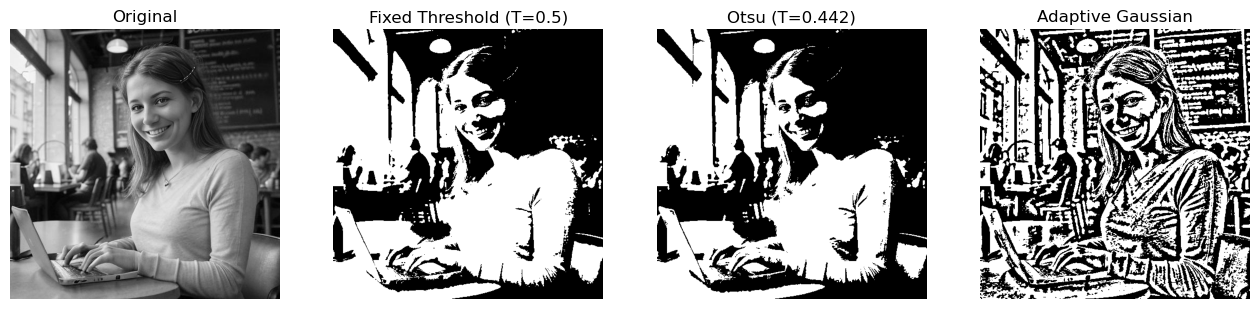

In [6]:
from skimage.io import imread
from skimage import img_as_float
from skimage.filters import threshold_otsu, threshold_local
import matplotlib.pyplot as plt

# ----- Görüntüyü yükle -----
img = img_as_float(imread("photo.jpeg", as_gray=True))

# ----- 1) Sabit threshold -----
T_fixed = 0.4
binary_fixed = img > T_fixed

# ----- 2) Otsu threshold -----
T_otsu = threshold_otsu(img)
binary_otsu = img > T_otsu

# ----- 3) Adaptive threshold -----
block_size = 35      # lokal pencere boyutu
T_local = threshold_local(img, block_size, method="gaussian")
binary_adaptive = img > T_local

# ----- Görselleştirme -----
fig, axes = plt.subplots(1,4, figsize=(16,4))

axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(binary_fixed, cmap="gray")
axes[1].set_title("Fixed Threshold (T=0.5)")
axes[1].axis("off")

axes[2].imshow(binary_otsu, cmap="gray")
axes[2].set_title(f"Otsu (T={T_otsu:.3f})")
axes[2].axis("off")

axes[3].imshow(binary_adaptive, cmap="gray")
axes[3].set_title("Adaptive Gaussian")
axes[3].axis("off")

plt.show()

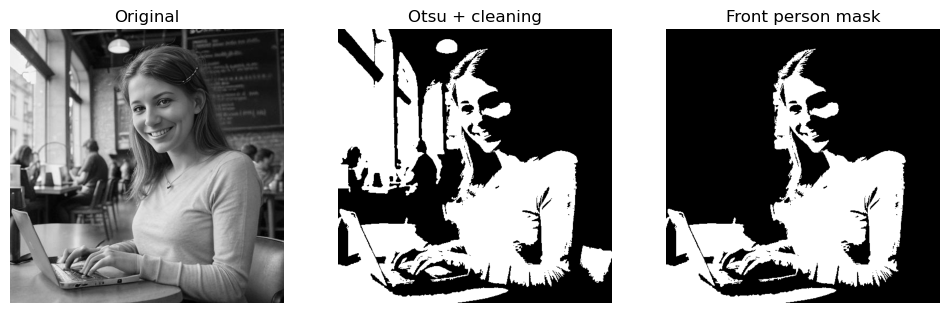

In [12]:
from skimage.io import imread
from skimage import img_as_float
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects
from skimage.measure import label, regionprops
import numpy as np
import matplotlib.pyplot as plt

img = img_as_float(imread("photo.jpeg", as_gray=True))

# 1) Otsu ile kaba maske
T = threshold_otsu(img)
binary = img > T   # nesneler beyaz, arka plan siyah varsayımı

# 2) Ufak objeleri temizle
clean = remove_small_objects(binary, min_size=500)

# 3) Bağlı bileşenleri bul
lab = label(clean)
regions = regionprops(lab)

h, w = img.shape
center = np.array([h/2, w/2])

# merkeze en yakın en büyük bölgeyi seç
best_label = 0
best_score = -1

for r in regions:
    area = r.area
    cy, cx = r.centroid
    dist = np.linalg.norm(np.array([cy, cx]) - center)
    score = area / (dist + 1e-6)  # büyük + merkeze yakın olsun
    if score > best_score:
        best_score = score
        best_label = r.label

person_mask = lab == best_label

# Sonucu göster
fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[0].imshow(img, cmap="gray"); axes[0].set_title("Original"); axes[0].axis("off")
axes[1].imshow(clean, cmap="gray"); axes[1].set_title("Otsu + cleaning"); axes[1].axis("off")
axes[2].imshow(person_mask, cmap="gray"); axes[2].set_title("Front person mask"); axes[2].axis("off")
plt.show()

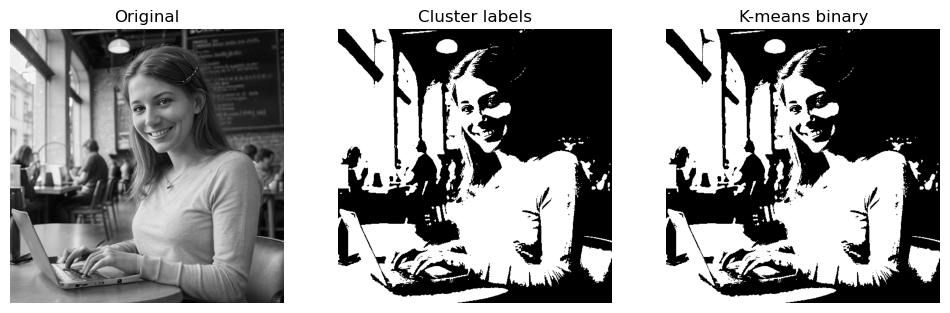

In [14]:
from skimage.io import imread
from skimage import img_as_float
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# read grayscale image
img = img_as_float(imread("photo.jpeg", as_gray=True))

# reshape as feature vector
pixels = img.reshape(-1, 1)

# KMeans: 2 clusters (foreground/background)
kmeans = KMeans(n_clusters=2, n_init="auto").fit(pixels)

# cluster labels
labels = kmeans.labels_.reshape(img.shape)

# determine which label corresponds to bright pixels
cluster_centers = kmeans.cluster_centers_.flatten()
bright_label = np.argmax(cluster_centers)

# make binary mask
binary = labels == bright_label

# show
fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[0].imshow(img, cmap='gray'); axes[0].set_title("Original"); axes[0].axis("off")
axes[1].imshow(labels, cmap='gray'); axes[1].set_title("Cluster labels"); axes[1].axis("off")
axes[2].imshow(binary, cmap='gray'); axes[2].set_title("K-means binary"); axes[2].axis("off")
plt.show()